In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [8]:
def MASeries(coeffs,std,nPoints):
    q=len(coeffs)-1
    np.random.seed()
    gaussNoise=np.random.normal(0., std, nPoints+q)
    x = []
    for i in range(q,nPoints+q):
        xNew = coeffs[0]+gaussNoise[i]
        for j in range(1,q+1):
            xNew += coeffs[j]*gaussNoise[i-j]
        x.append(xNew)
    return x

(500, 0.02883768533741579, 1.3266930532950547)

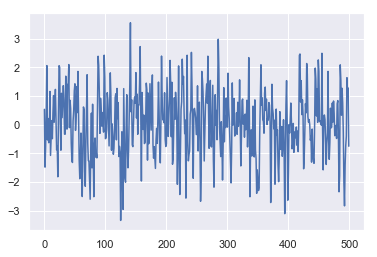

In [15]:
test = MASeries([0., .5], 1, 5000)
plt.plot(test)
len(test), np.mean(test), np.var(test)

{'Len': 5000,
 'Mean': -0.013042073820193375,
 'Var': 1.2636481400827544,
 'SupposedVar': 1.29}

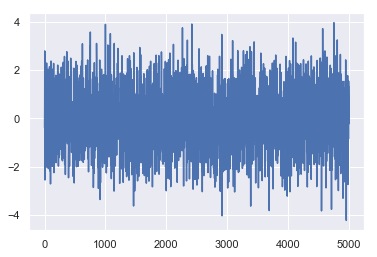

In [17]:
test2=MASeries([0., .5, .2],1,5000)
plt.plot(test2)
{"Len": len(test2), "Mean": np.mean(test2), "Var": np.var(test2), "SupposedVar":1+ .5**2 + .2**2}

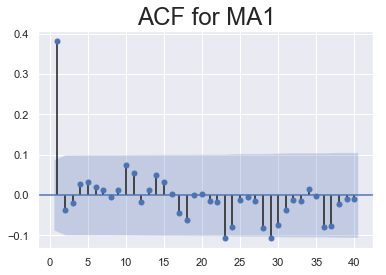

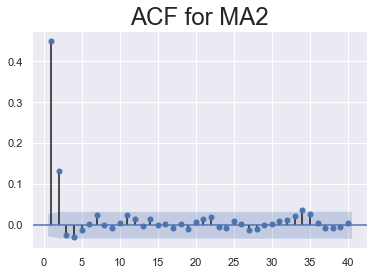

In [19]:
sgt.plot_acf(test,zero=False,lags=40)
plt.title("ACF for MA1", size=24);
sgt.plot_acf(test2,zero=False,lags=40)
plt.title("ACF for MA2", size=24);

Above we see that MA models are characterized by k first lags being relevant, rest not.

In [20]:
from statsmodels.tsa.arima_process import arma_generate_sample

{'Len': 5000,
 'Mean': -0.07367770545633746,
 'Var': 1.2433431831179134,
 'SupposedVar': 1.25}

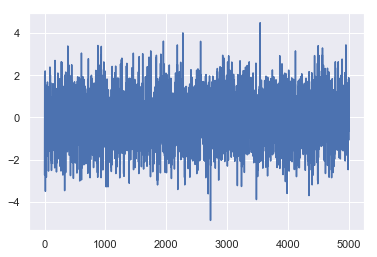

In [36]:
arparams = np.array([0., 0.])
maparams = np.array([0., .5])
ar=np.r_[1,-arparams]
ma=np.r_[1,maparams]
nobs=5000
np.random.seed=(2014)
y = arma_generate_sample(ar, ma, nobs)
plt.plot(y)
{"Len": len(y), "Mean": np.mean(y), "Var": np.var(y), "SupposedVar":1+ .5**2}

In [37]:
from statsmodels.tsa.arima_process import ArmaProcess

{'Len': 5000,
 'Mean': 0.00371810110077048,
 'Var': 1.2039518579777821,
 'SupposedVar': 1.25}

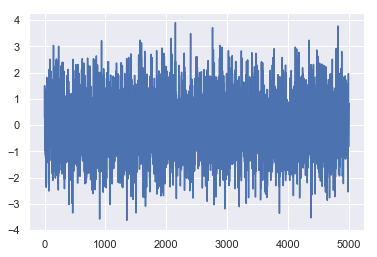

In [43]:
ar = np.array([0, 0])
ma = np.array([0., .5])
ar=np.r_[1,-ar]
ma=np.r_[1,ma]
nobs=5000
np.random.seed=(2014)

ARMA_object = ArmaProcess(ar, ma)
yAP = ARMA_object.generate_sample(nsample=nobs)
plt.plot(yAP)
{"Len": len(yAP), "Mean": np.mean(yAP), "Var": np.var(yAP), "SupposedVar":1+ .5**2}


{'Len': 5000,
 'Mean': -0.03550991187263619,
 'Var': 1.7157642249487675,
 'SupposedVar': 1.25}

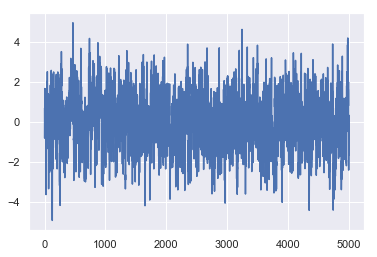

In [45]:
ar = np.array([.5, .2])
ma = np.array([0., 0])
ar=np.r_[1,-ar]
ma=np.r_[1,ma]
nobs=5000
np.random.seed=(2014)

ARMA_object = ArmaProcess(ar, ma)
yAR1 = ARMA_object.generate_sample(nsample=nobs)
plt.plot(yAR1)
{"Len": len(yAR1), "Mean": np.mean(yAR1), "Var": np.var(yAR1), "SupposedVar":1+ .5**2}


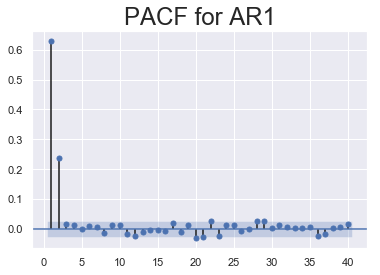

In [46]:
sgt.plot_pacf(yAR1,zero=False,lags=40)
plt.title("PACF for AR1", size=24);

PACF does for AR what ACF does for MA

{'Len': 5000, 'Mean': 0.014229101737384385, 'Var': 1.8373009823487838}

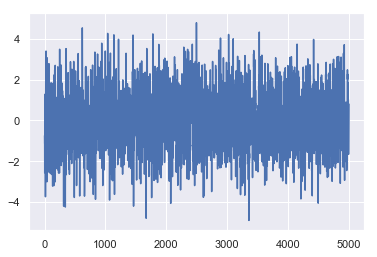

In [97]:
ar = np.array([.3,])
ma = np.array([.5, .2])
ar=np.r_[1,-ar]
ma=np.r_[1,ma]
nobs=5000
np.random.seed=(2014)

ARMA_object = ArmaProcess(ar, ma)
yARMA22 = ARMA_object.generate_sample(nsample=nobs)
plt.plot(yARMA22)
{"Len": len(yARMA22), "Mean": np.mean(yARMA22), "Var": np.var(yARMA22)}


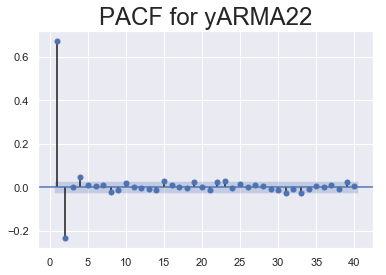

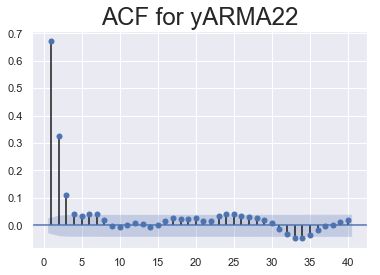

In [86]:
sgt.plot_pacf(yARMA22,zero=False,lags=40)
plt.title("PACF for yARMA22", size=24);
sgt.plot_acf(yARMA22,zero=False,lags=40)
plt.title("ACF for yARMA22", size=24);


In [87]:
from statsmodels.tsa.stattools import arma_order_select_ic
res = arma_order_select_ic(yARMA22,ic=['aic', 'bic'],trend='nc')
res.aic_min_order

(4, 0)

In [88]:
from pmdarima import auto_arima

In [89]:
auto_arima(yARMA22)

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [90]:
auto_arima(yARMA22).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -7091.504
Date:                Tue, 19 May 2020   AIC                          14193.008
Time:                        18:35:24   BIC                          14225.594
Sample:                             0   HQIC                         14204.429
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0538      0.023      2.291      0.022       0.008       0.100
ar.L1          0.3548      0.033     10.594      0.000       0.289       0.420
ma.L1          0.4740      0.034     13.825      0.000       0.407       0.541
ma.L2          0.1717      0.025      6.868      0.000       0.123       0.221
sigma2         0.9986      0.020     49.664      0.000       0.959       1.038
===================================================================================
Ljung-Box (Q):                       39.65   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.49   Prob(JB):                         0.91
Heteroskedasticity (H):               1.05   Skew:                             0.01
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
stepwise_fit=auto_arima(yARMA22, start_p=0, start_q=0, max_p=6, max_q=3, d=None, trace=True, stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=17485.915, BIC=17498.949, Time=0.089 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=14478.960, BIC=14498.512, Time=0.317 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=14951.092, BIC=14970.644, Time=0.598 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=17502.015, BIC=17508.532, Time=0.046 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=14199.255, BIC=14225.323, Time=0.414 seconds
Fit ARIMA(3,0,0)x(0,0,0,0) [intercept=True]; AIC=14201.254, BIC=14233.840, Time=0.544 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=14201.254, BIC=14233.840, Time=0.425 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=14233.987, BIC=14260.056, Time=0.576 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=14201.235, BIC=14240.339, Time=2.213 seconds
Total fit time: 5.232 seconds


In [92]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -7095.627
Date:                Tue, 19 May 2020   AIC                          14199.255
Time:                        18:35:29   BIC                          14225.323
Sample:                             0   HQIC                         14208.391
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0337      0.014      2.377      0.017       0.006       0.061
ar.L1          0.8298      0.014     59.905      0.000       0.803       0.857
ar.L2         -0.2340      0.014    -16.763      0.000      -0.261      -0.207
sigma2         1.0002      0.020     49.708      0.000       0.961       1.040
===================================================================================
Ljung-Box (Q):                       47.36   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.20   Prob(JB):                         0.93
Heteroskedasticity (H):               1.05   Skew:                             0.01
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Homework:
TradeInventories - find ARIMA model, single differencing, d = 1, find the best p and q combination, discuss whether you can use the functinos from this workbook

seasonal_decompose from statsmodels.tsa.seasonal